In [1]:
#import relevant packages for analysis

from __future__ import print_function

import os
import sys

import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

PROJ_ROOT = os.path.join(os.pardir)

sns.set()
sns.set_style("darkgrid")
sns.set_context("poster")

import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
%load_ext watermark
%watermark -a "Bryan Dickinson" -d -t -v -p numpy,pandas

Bryan Dickinson 2019-09-19 05:27:31 

CPython 3.7.3
IPython 7.7.0

numpy 1.16.4
pandas 0.25.0


In [3]:
customer_path = os.path.join(PROJ_ROOT, 
                         'data', 'processed',
                         'feat_data.csv')
data = pd.read_csv(customer_path,
                    )

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 19 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null int64
Age                           550068 non-null object
Occupation                    550068 non-null int64
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
_Age                          550068 non-null float64
City_A                        550068 non-null int64
City_B                        550068 non-null int64
City_C                        550068 non-null int64
_City_Yr                      550068 non-null int64
Product_Category_mean         550068 non-null fl

In [5]:

def replace_nan(x):
    ''' Function to replace NaN values with a zero and to return the existing value with a string'''
    if pd.isnull(x):
        x = '0'
    else:
        x = int(x)
    
    if int(x) < 10:
        x = '0' + str(x)
        
    return str(x)


In [6]:
df = data.copy()
#replace NaNs and convert category values to strings
df['Product_Category_1'] = df.Product_Category_1.apply(lambda x: replace_nan(x))
#rename the category column
df.rename(columns = {'Product_Category_1': 'Product_Categories'}, inplace = True)
#get dummies for the occupation column
df = pd.get_dummies(df, columns = ['Occupation'], prefix = ['Occ'])





In [7]:
#drop non-numerical columns
df.drop(['Age','Stay_In_Current_City_Years',
         'Product_Category_mean', 'Product_ID_mean', 
         'User_ID_count', 'Product_ID'], axis = 1, inplace = True)

In [8]:
df = df[['Product_Categories','User_ID', 'Gender', 'Marital_Status', '_City_Yr', '_Age','Purchase',
       'City_A', 'City_B', 'City_C', 'Occ_0', 'Occ_1', 'Occ_10', 'Occ_11',
       'Occ_12', 'Occ_13', 'Occ_14', 'Occ_15', 'Occ_16', 'Occ_17', 'Occ_18',
       'Occ_19', 'Occ_2', 'Occ_20', 'Occ_3', 'Occ_4', 'Occ_5', 'Occ_6',
       'Occ_7', 'Occ_8', 'Occ_9']]
df.head()

,Product_Categories,User_ID,Gender,Marital_Status,_City_Yr,_Age,Purchase,City_A,City_B,City_C,...,Occ_19,Occ_2,Occ_20,Occ_3,Occ_4,Occ_5,Occ_6,Occ_7,Occ_8,Occ_9
0,03,1000001,0,0,2,8.5,8370,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,01,1000001,0,0,2,8.5,15200,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,12,1000001,0,0,2,8.5,1422,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,12,1000001,0,0,2,8.5,1057,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,08,1000002,1,0,4,55.0,7969,0,0,1,...,0,0,0,0,0,0,0,0,1,0


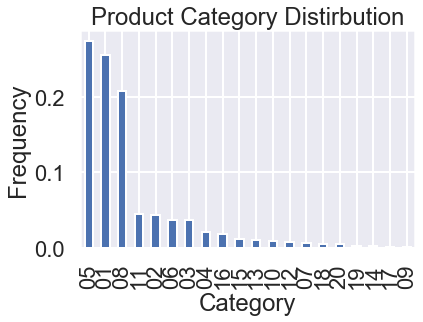

In [9]:
#plot the distribution of categories
df.Product_Categories.value_counts(normalize = True).plot(kind = 'bar')
_=plt.title('Product Category Distirbution')
_=plt.xlabel('Category')
_=plt.ylabel('Frequency')

In [10]:
#print the top 5 categories
print('Top 5 Categories Values','\n',df.Product_Categories.value_counts().head(5),'\n')

print('Top 5 Categories Normalized','\n',df.Product_Categories.value_counts(normalize = True).head(5))

Top 5 Categories Values 
 05    150933
01    140378
08    113925
11     24287
02     23864
Name: Product_Categories, dtype: int64 

Top 5 Categories Normalized 
 05    0.274390
01    0.255201
08    0.207111
11    0.044153
02    0.043384
Name: Product_Categories, dtype: float64


In [11]:
def consolidate(x):
    '''Funciton to consolodate the categories that are not in the top 3'''
    if x not in top_categories:
        return 'other'
    else:
        return x

In [12]:
#set the product_categories column as one of the top 3 categories or 'other' if it is not.
#This will help 'unbalance' the minority categories
top_categories = df.Product_Categories.value_counts()[:3].index
df['Product_Categories'] = df.Product_Categories.apply(consolidate)

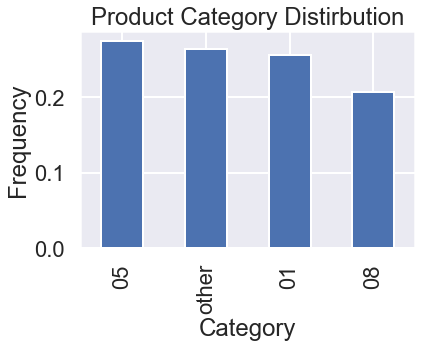

In [13]:
df.Product_Categories.value_counts(normalize = True).plot(kind = 'bar')
_=plt.title('Product Category Distirbution')
_=plt.xlabel('Category')
_=plt.ylabel('Frequency')

In [14]:
df.head()

,Product_Categories,User_ID,Gender,Marital_Status,_City_Yr,_Age,Purchase,City_A,City_B,City_C,...,Occ_19,Occ_2,Occ_20,Occ_3,Occ_4,Occ_5,Occ_6,Occ_7,Occ_8,Occ_9
0,other,1000001,0,0,2,8.5,8370,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,01,1000001,0,0,2,8.5,15200,1,0,0,...,0,1,0,0,0,0,0,0,0,0
2,other,1000001,0,0,2,8.5,1422,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,other,1000001,0,0,2,8.5,1057,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,08,1000002,1,0,4,55.0,7969,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [15]:
def merge_cols(row):
    '''function to merge the selected columns into a string'''
    g = str(row['Gender'])
    m = str(row['Marital_Status'])
    cy = str(row['_City_Yr'])
    ca = str(row['City_A'])
    cb = str(row['City_B'])
    cc = str(row['City_C'])
    
    cat = g+m+cy+ca+cb+cc
    
    return cat.replace('.', '')
#group the data by the selected columns and find the mean purchase amount
purchase_df = df.groupby(['Gender','Marital_Status','_City_Yr', 
                       'City_A','City_B','City_C'], 
                      as_index = False)['Purchase'].mean()

#use the 'merge_cols' function to set a new column 'key'
purchase_df['key'] = purchase_df.apply(merge_cols, axis = 1)

#create a dictionary with 'key' as the column data and the purchase means as the value
pur_dict = purchase_df[['key', 'Purchase']].set_index('key').T.to_dict('records')[0]

In [16]:
#create a new dataframe
cat_df = df.copy()
#set a 'number' column and set each row value as '1'
cat_df['n'] = 1
#group & count purchases by user_id and product category
cat_df = cat_df.groupby(['User_ID', 'Product_Categories'])[['n']].count()
#pivot the df so that the result is such that each row is a unique user, and how many of each category they have purchased
cat_df = cat_df.pivot_table(index = 'User_ID', columns = 'Product_Categories', values = 'n', fill_value = 0)

In [17]:
cat_df.head()

Product_Categories,01,05,08,other
User_ID,,,,
1000001,4,2,8,21
1000002,31,13,25,8
1000003,15,9,1,4
1000004,13,0,0,1
1000005,18,20,44,24


In [18]:
#merge the customer data with the category purchases
df = df.drop('Product_Categories', axis = 1)
df = df.drop_duplicates()
df = pd.merge(cat_df, df, on = 'User_ID')

In [19]:
categories = list(cat_df.columns)
#drop the target variables and the user_id data from the df
dropped = df.drop(categories+['User_ID'], axis = 1)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import roc_curve, roc_auc_score, recall_score, accuracy_score, precision_score
from sklearn.linear_model import LogisticRegression

#function to find the best paramaters using gridsearch cv
def cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=5):
    gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring = 'precision')
    gs.fit(Xtrain, ytrain)
    best = gs.best_estimator_
    return best

#function to find the class weight percentage (for imbalanced data)
def find_cw_p(X, y):
    p=0
    p = (y.sum() / X.shape[0]) * 100
    z = 100 - p
    cw = {0 : z, 1: p}
    return cw

#function to find the optimal class weight value
def find_cw(y, X = dropped.values):
    best_score = -np.inf
    best_param = None
    cw = find_cw_p(X, y) # find the freqency of the the target variable in the dataset

#use test train split with the below class weights to find the optimal class weight value
    Xlr, Xtestlr, ylr, ytestlr = train_test_split(X, 
                                              y,random_state=5, stratify = y)
    
    class_weight = [{0:.1, 1:.9}, {0:.2, 1:.8},{0:.3, 1:.7},{0:.4, 1:.6},
                {0:.5, 1:.5},{0:.6, 1:.4},{0:.7, 1:.3},{0:.8, 1:.2},
                {0:.9, 1:.1}, {0:1, 1:1},{0:1, 1:2},{0:1, 1:50},
                {0:2, 1:1},{0:1, 1:50},'balanced', cw]
    
    for c in class_weight:       
        clf = RandomForestClassifier(n_estimators = 250, class_weight = c, random_state = 5 )
        try:
            clf.fit(Xlr, ylr)
        except:
            continue
            
# Fit the model on the trainng data.    
        score = precision_score(clf.predict(Xtestlr), ytestlr)

        if score > best_score:
            best_score = score
            best_param = c
    return best_param, best_score #return the best paramter and the score

#function to run the classifier
def do_classify(clf, parameters, y, X, train_size=0.7):

    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=train_size) 
    clf = cv_optimize(clf, parameters, Xtrain, ytrain)
    clf=clf.fit(Xtrain, ytrain)
    training_fone = clf.score(Xtrain, ytrain)
    test_fone = clf.score(Xtest, ytest)
    print("F-1 on training data: {:0.2f}".format(training_fone))
    print("F-1 on test data:     {:0.2f}".format(test_fone))
    return clf, Xtrain, ytrain, Xtest, ytest, test_fone

In [21]:
%%time
from sklearn.ensemble import RandomForestClassifier

params = {}
#for each category (target variable), find the best class weight parameter by running using CV with different parameters
for c in cat_df.columns:
    y = df[c].astype('bool').values*1
    
    best_param, best_score = find_cw(y)
    params[c] = (best_param, best_score) # place each class weight parameter into a dictionary
    print('finished processing ', c)

finished processing  01
finished processing  05
finished processing  08
finished processing  other
Wall time: 3h 4min 29s


In [22]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV 
classifiers = {}
acc_scores = []
n_estimators = [50, 200]
max_features = ['auto', 'log2']
min_samples_leaf = [5, 10, 20, 50]
min_samples_split = [2, 10, 15]
class_weight = [params[c][0], None] #use the best class weight parameter
    
param_grid = {'C':np.logspace(-5, 8, 10)} 
#set the x values
X = dropped.values
#for each variable train a classifier, using the parameters above to find the best parameter
for c in cat_df:
    y = df[c].astype('bool').values*1
    
    
    clf, Xtrain, ytrain, Xtest, ytest, accuracy  = do_classify(
        LogisticRegression(random_state = 5, n_jobs = -1 ), 
        param_grid,
        y,
        X)
    acc_scores.append(accuracy)
    classifiers[c] = (clf, Xtrain, ytrain, Xtest, ytest, accuracy)

F-1 on training data: 1.00
F-1 on test data:     1.00
F-1 on training data: 0.99
F-1 on test data:     0.99
F-1 on training data: 0.99
F-1 on test data:     0.98
F-1 on training data: 1.00
F-1 on test data:     1.00
Wall time: 10min 11s


In [24]:
#Evaluation Metrics
p_metrics = {}

#for each classifier calculate Recall, Precision and Accuracy
for cat, clf in classifiers.items():
    y_pred = clf[0].predict(clf[3])
    y_true = clf[4]
    y_predict_proba = clf[0].predict_proba(clf[3])[:,1]
    
    rec_score = recall_score(y_true, y_pred)
    p_score = precision_score(y_true, y_pred)
    acc_score = accuracy_score(y_true, y_pred)

    
    p_metrics[cat] = [rec_score, p_score, acc_score]

pd.DataFrame(p_metrics, index = ['Recall','Precision','Accuracy'])

,01,05,08,other
Recall,1.000000,1.000000,1.000000,1.000000
Precision,0.995303,0.993566,0.984839,0.998955
Accuracy,0.995303,0.993566,0.984839,0.998955


Using F1 as the evaluation metric, the harmonic mean of recall and precision.
With F1 scores ranging from .79 to .84 this is a meaningful model given the customer behavioral aspects of the problem.

In [25]:
def predict_category (Gender, Marital_Status, _City_Yr, _Age, City_Loc, Occ, Category_value = None ):
    '''Function to take in customer demographic information as parameters and will return product category probablilities'''
    probs = {}
    
    if Category_value != None:
        Category_value = str(Category_value)
    
        if int(Category_value) < 10:
            Category_value = '0' + Category_value
        
    
    if Gender == 'Male' or 'M':
        Gender = 1
    else:
        Gender = 0
        
    if Marital_Status == 'Married' or 'M':
        Marital_Status = 1
    else:
        Marital_Status = 0
        
        
    indf = pd.DataFrame({'Gender': [Gender], 'Marital_Status': [Marital_Status],
                         '_City_Yr': [_City_Yr], '_Age': [_Age]}, columns = ['Gender', 
                                                                             'Marital_Status', '_City_Yr', '_Age','Purchase',
                                                                             'City_A', 'City_B', 'City_C', 'Occ_0', 
                                                                             'Occ_1', 'Occ_10', 'Occ_11','Occ_12',
                                                                             'Occ_13', 'Occ_14', 'Occ_15','Occ_16',
                                                                             'Occ_17', 'Occ_18','Occ_19', 'Occ_2', 
                                                                             'Occ_20', 'Occ_3', 'Occ_4','Occ_5', 
                                                                             'Occ_6','Occ_7', 'Occ_8', 'Occ_9'])
    
    
    for col in indf.columns:
        if col.startswith('Occ') or col.startswith('City_'):
            indf.at[0, col] = 0
            
        if col.endswith('_'+str(Occ)) :
            indf.at[0, col] = 1
        
        if col.endswith('_'+City_Loc) :
            indf.at[0, col] = 1  

            
    indf['Purchase'] = indf.apply(merge_cols, axis = 1)

    
    X = indf.values
    
    
    for cat, clf in classifiers.items():
        probs[cat] = clf[0].predict_proba(X)[:,1][0]
    

    probs = {k:[v] for (k,v) in probs.items()}
    probs = pd.DataFrame(probs).reset_index(drop = True)
    
    if Category_value != None:
        clist = [col for col in probs.columns if col.startswith(Category_value)]
        probs = probs.loc[:,clist]
    
    probs.columns = [col[:2] + ' ' + col[2:4] + ' ' +col[4:] for col in probs.columns]
   
    probs = probs.T
    probs = probs.rename(columns = {0 :'Probability'} )
    probs.index.names = ['Category']

    probs = probs.sort_values(by = 'Probability', ascending = False)
    return probs



            

In [26]:
predict_category('Male', 'Single', 2, 18, 'B', 17 )

,Probability
Category,
ot he r,1.000000
01,1.000000
05,1.000000
08,0.999996
